In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.externals import joblib
from tqdm import tqdm

In [34]:
DATADIR = "/home/apofeo/Documents/clp_rotated_v5/train"

In [1]:
DATADIR = "/home/apofeo/Documents/clp_rotated_v6/train"

In [2]:
DATADIR = "/home/apofeo/Documents/clp_rotated_v7/test"

In [3]:
DATADIR = "/home/apofeo/Documents/symbols"

In [64]:
DATADIR = "im_base_to_angle/DI_PA_Test/test"

In [2]:
DATADIR = "im_base_to_angle/rotated_5_pa/test"

In [4]:
directories = [x[0] for x in os.walk("/home/apofeo/Documents/symbols")]

In [6]:
# print(directories[1:])
# print(len(directories[1:]))
# print(directories.split("/"))
CATEGORIES = []
for folder in directories[1:]:
    CATEGORIES.append(folder.split("/")[-1])
print(sorted(CATEGORIES))
print(len(CATEGORIES))
CATEGORIES = sorted(CATEGORIES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'А', 'В', 'Е', 'К', 'М', 'Н', 'О', 'Р', 'С', 'Т', 'У', 'Х']
22


In [2]:
CATEGORIES_INT = [i for i in range(1, 361)]
CATEGORIES = [str(item) for item in CATEGORIES_INT]
# map(str, CATEGORIES)
# print(CATEGORIES)

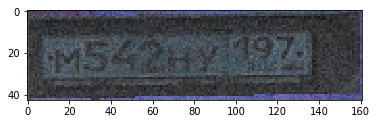

In [5]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:
print(img_array)

[[[ 79  66  77]
  [ 71  58  72]
  [ 77  66  81]
  ...
  [ 79  81 134]
  [ 89  92 144]
  [ 79  83 138]]

 [[ 87  74  90]
  [ 82  72  87]
  [ 74  63  79]
  ...
  [ 42  42  47]
  [ 64  64  69]
  [ 69  74 131]]

 [[ 66  54  71]
  [ 78  66  83]
  [ 81  67  84]
  ...
  [ 45  46  49]
  [ 65  65  68]
  [ 80  84 141]]

 ...

 [[ 87  66 100]
  [ 59  58  61]
  [ 43  43  46]
  ...
  [ 80  83 146]
  [ 80  81 146]
  [ 83  85 148]]

 [[112  90 123]
  [ 52  51  54]
  [ 70  69  73]
  ...
  [ 86  86 152]
  [ 94  97 159]
  [ 88  91 154]]

 [[102  82 113]
  [ 95  71  94]
  [106  85 117]
  ...
  [ 89  88 152]
  [ 87  89 154]
  [ 87  87 153]]]


In [6]:
print(img_array.shape)

(43, 161, 3)


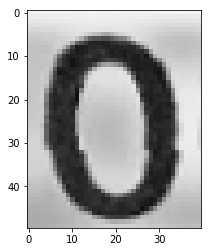

In [12]:
IMG_SIZE_X, IMG_SIZE_Y = 50, 40

new_array = cv2.resize(img_array, (IMG_SIZE_Y, IMG_SIZE_X))
plt.imshow(new_array, cmap='gray')
plt.show()

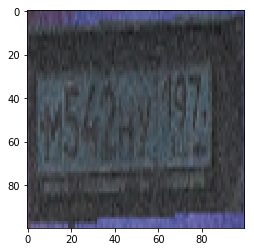

In [10]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [11]:
training_data = []

In [12]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                path_to_img = os.path.join(path,img)
                training_data.append([new_array, class_num, path_to_img])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

In [13]:
create_training_data()

100%|██████████| 100/100 [00:01<00:00, 97.76it/s]


In [14]:
print(len(training_data))

36000


In [15]:
import random

In [16]:
random.shuffle(training_data)

In [20]:
# print(training_data[0])

In [17]:
for sample in training_data[:10]:
    print(sample[1])

101
306
220
90
263
195
328
358
313
99


In [18]:
X = []
Y = []
# Z = []

In [19]:
for features,label, path in training_data:
    X.append(features)
    Y.append(label)
#     Z.append(path)

In [ ]:
# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

In [21]:
filename = 'trained_data/X_CLP_CI_PA_3CH_V6_DI.sav'
joblib.dump(X, filename)

['trained_data/X_CLP_CI_PA_3CH_V6_DI.sav']

In [22]:
filename = 'trained_data/Y_CLP_CI_PA_3CH_V6_DI.sav'
joblib.dump(Y, filename)

['trained_data/Y_CLP_CI_PA_3CH_V6_DI.sav']

36000


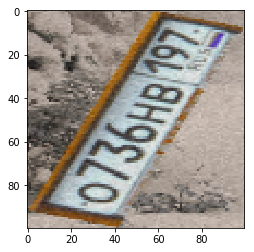

In [19]:
filename = 'trained_data/X_CLP_CI_PA_3CH_V6_DI.sav'
loaded_X = joblib.load(filename)
print(len(loaded_X))
plt.imshow(loaded_X[0])

In [20]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [22]:
print(X[0].shape)

(100, 100, 3)


In [25]:
filename = 'trained_data/to_test/X_CLP_CI_PA_3CH_V7.sav'
joblib.dump(X, filename)

['trained_data/to_test/X_CLP_CI_PA_3CH_V7.sav']

In [26]:
filename = 'trained_data/to_test/Y_CLP_CI_PA_3CH_V7.sav'
joblib.dump(Y, filename)

['trained_data/to_test/Y_CLP_CI_PA_3CH_V7.sav']

In [27]:
filename = 'trained_data/to_test/Z_CLP_CI_PA_3CH_V7.sav'
joblib.dump(Z, filename)

['trained_data/to_test/Z_CLP_CI_PA_3CH_V7.sav']